# Netflix data analysis and visualisation

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.show()

## importing the dataset

In [7]:
data = pd.read_csv(r'C:\Users\Lenovo\Downloads\netflix_dataset.csv')

## null values in the dataset

In [12]:
data.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

## dropping the null values

In [20]:
data.dropna(inplace=True)

In [16]:
data[data.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


## dropping the duplicate records

In [17]:
data.drop_duplicates(inplace=True)

## now having 4809 records after cleaning the data

In [21]:
data

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
...,...,...,...,...,...,...,...,...,...,...,...
7780,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
7782,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...
7783,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...


## 1. Show Types Distribution:

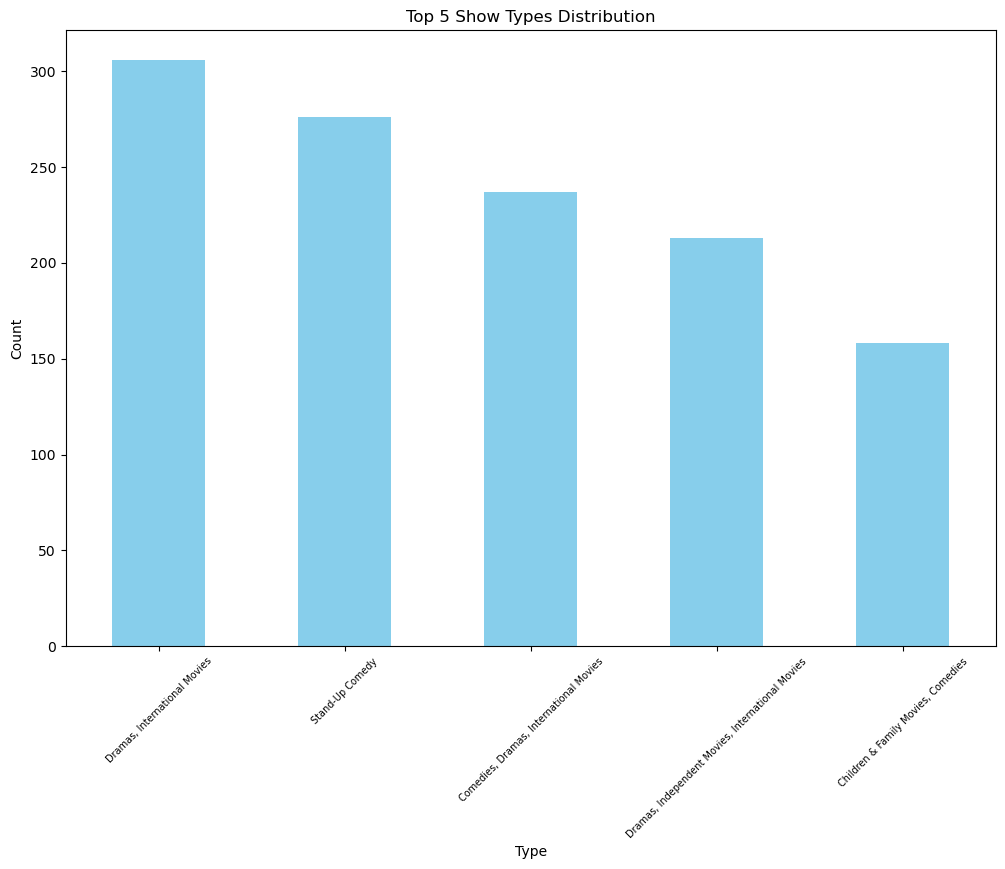

In [117]:
top_n_types = data['Type'].value_counts().nlargest(5)

plt.figure(figsize=(12, 8))
top_n_types.plot(kind='bar', color='skyblue')
plt.title('Top 5 Show Types Distribution')
plt.xlabel('Type')
plt.xticks(rotation=45,fontsize=7)
plt.ylabel('Count')
plt.show()

## 2. Category Distribution

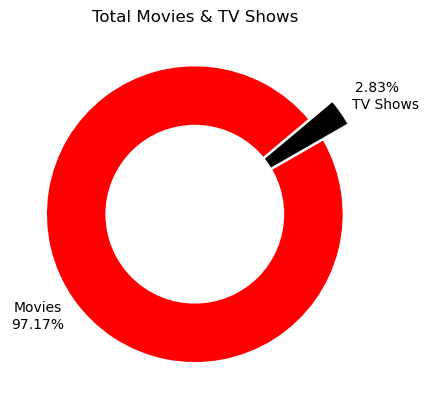

In [151]:
a = data.Category.value_counts()
plt.pie(a, labels = ['Movies','TV Shows'], colors=['red','black'], startangle=40,radius=1,explode=(0,0.2),
       autopct='%1.2f%%', pctdistance=1.3)
circle = plt.Circle((0,0),0.6,color='white')
c= plt.gcf()
c.gca().add_artist(circle)
plt.title("Total Movies & TV Shows")
plt.show()

## 3. Country-wise Content

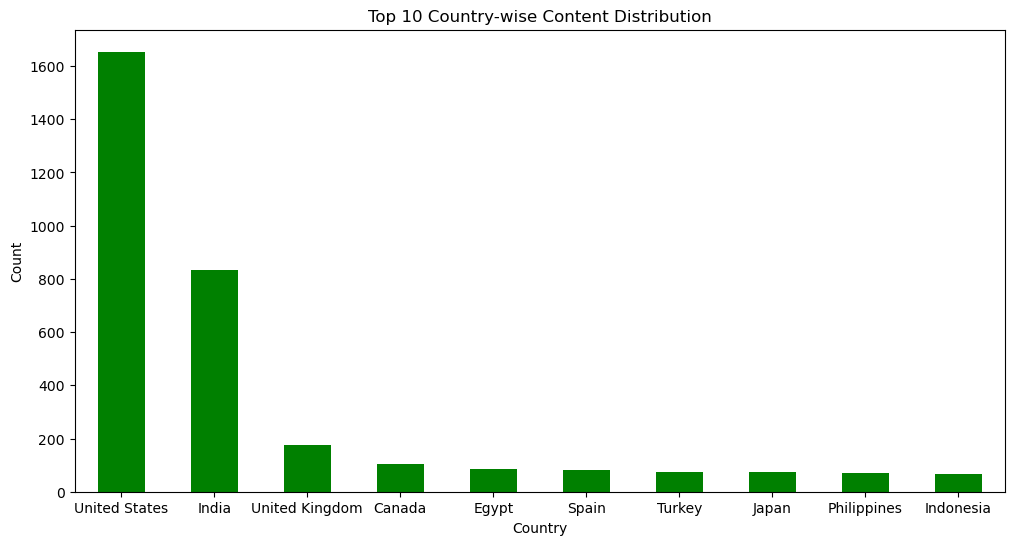

In [57]:
top_n_countries = data['Country'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
top_n_countries.plot(kind='bar', color='green')
plt.title('Top 10 Country-wise Content Distribution')
plt.xlabel('Country')
plt.xticks(rotation=0,ha='center')
plt.ylabel('Count')
plt.show()

In [ ]:
data['Date_N'] = pd.to_datetime(data['Release_Date'],  errors='coerce') converting the date column to datetime column

## 4. Release Date Analysis

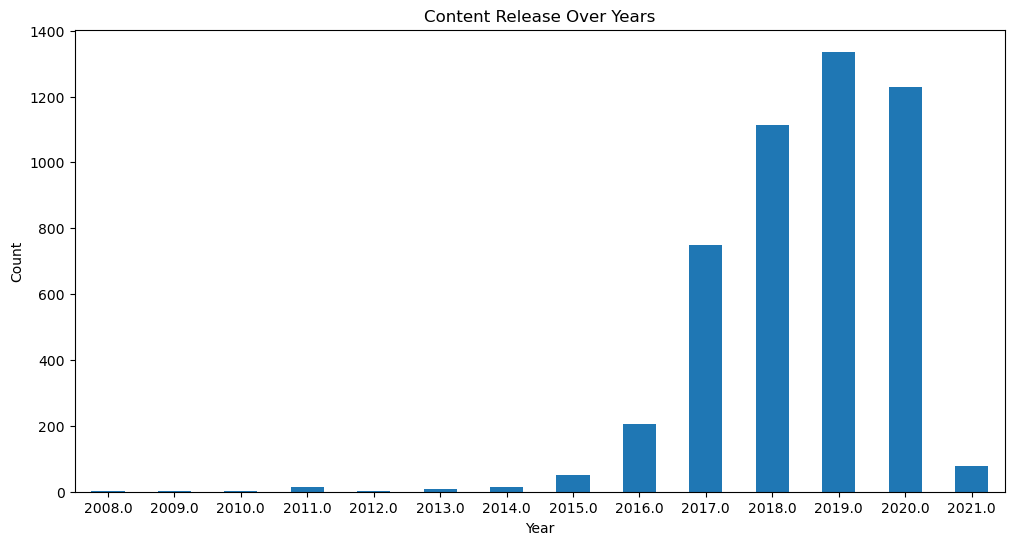

In [63]:
plt.figure(figsize=(12, 6))
data['Date_N'] = pd.to_datetime(data['Date_N'])
data['Date_N'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Content Release Over Years')
plt.xlabel('Year')
plt.xticks(rotation=0,ha='center')
plt.ylabel('Count')
plt.show()

## 5. Rating Distribution

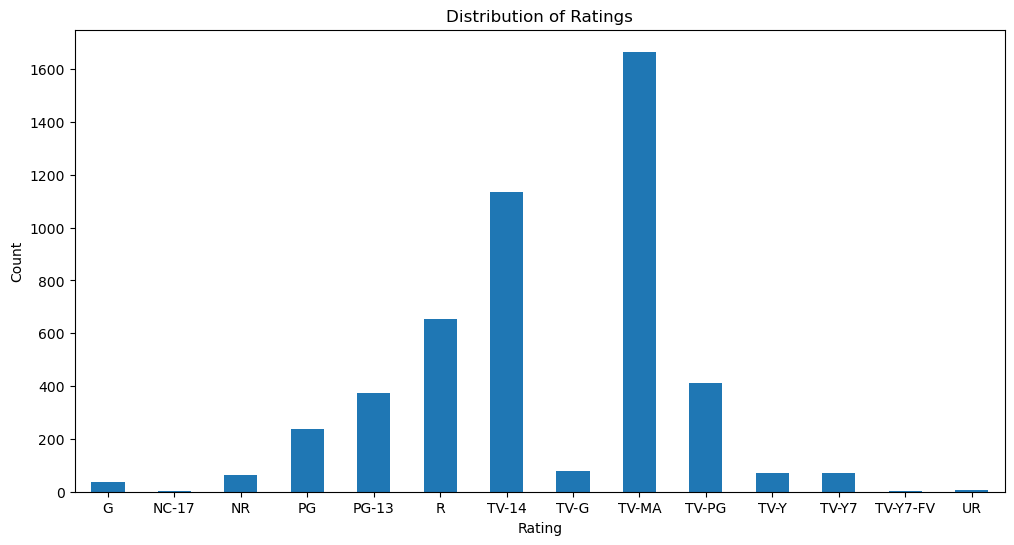

In [112]:
plt.figure(figsize=(12, 6))
data['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

In [64]:
#creating minutes and unit columns from duration column to split the min part and sort the max duration for the movie
data[['Minutes','Unit']] = data.Duration.str.split(' ',expand =True)

## 6. Duration Analysis

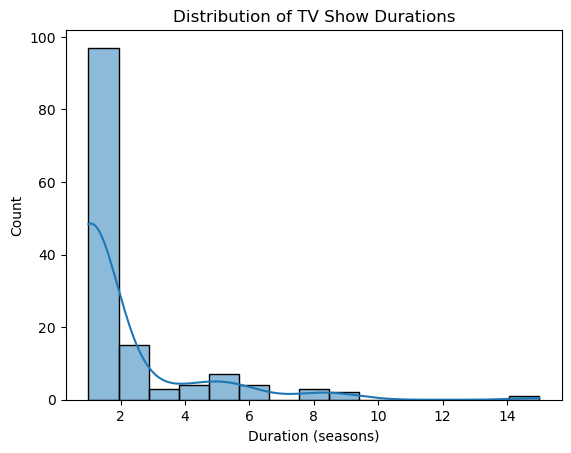

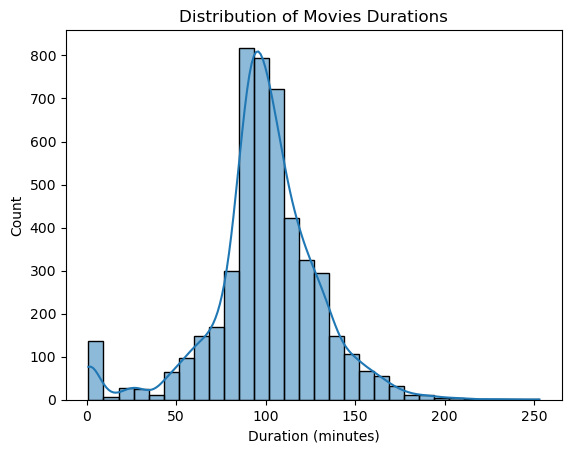

In [93]:
tv_show_data = data[data['Category'] == 'TV Show'].copy()
tv_show_data['Minutes'] = tv_show_data['Minutes'].astype(int)

sns.histplot(tv_show_data['Minutes'], bins=15, kde=True)
plt.title('Distribution of TV Show Durations')
plt.xlabel('Duration (seasons)')
plt.ylabel('Count')
plt.show()

data['Minutes'] = data['Minutes'].astype(int)
sns.histplot(data['Minutes'], bins=30, kde=True)
plt.title('Distribution of Movies Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

## 7. Director and Cast Analysis

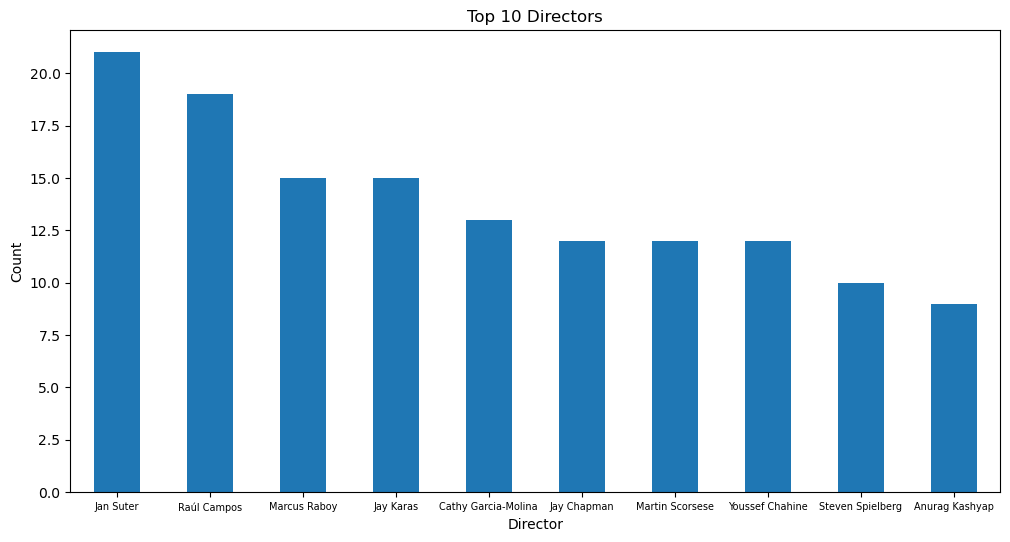

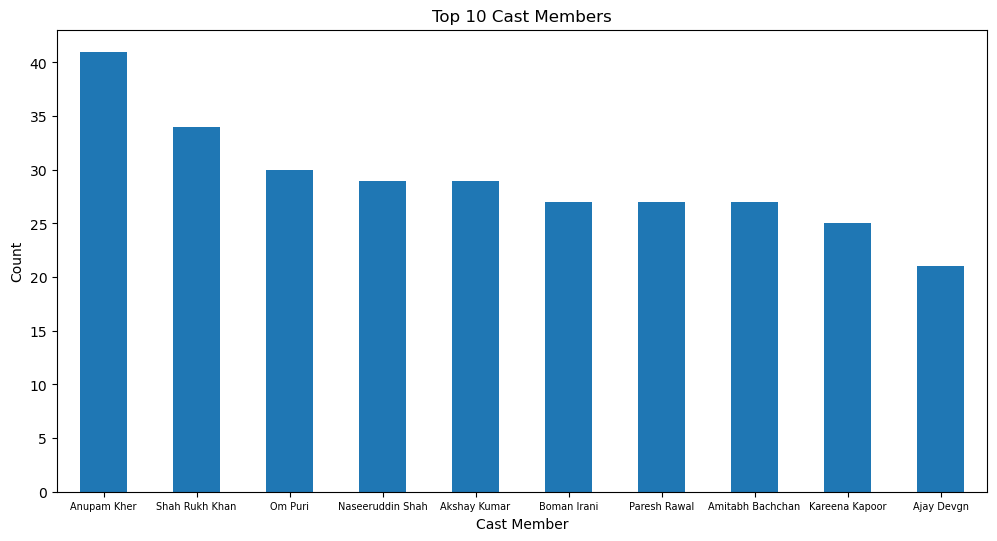

In [109]:
directors = data['Director'].str.split(',').explode().str.strip()
casts = data['Cast'].str.split(',').explode().str.strip()

plt.figure(figsize=(12, 6))
directors.value_counts().head(10).plot(kind='bar', title='Top 10 Directors')
plt.xlabel('Director')
plt.xticks(rotation=0,fontsize=7)
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
casts.value_counts().head(10).plot(kind='bar', title='Top 10 Cast Members')
plt.xticks(rotation=0,fontsize=7)
plt.xlabel('Cast Member')
plt.ylabel('Count')
plt.show()

In [119]:
#pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## 8. Word Cloud for Description

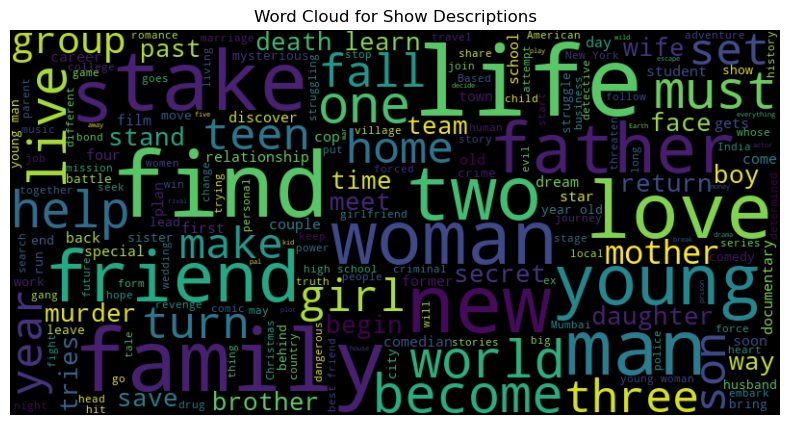

In [128]:
text = ' '.join(data['Description'].dropna())
wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Show Descriptions')
plt.show()

## 9. Trends Over Time

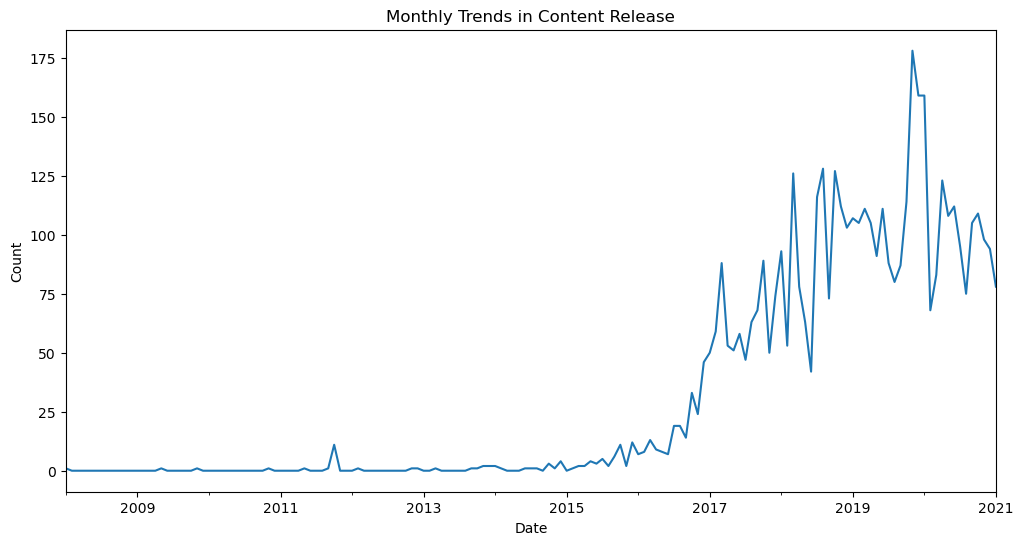

In [132]:
monthly_counts = data.resample('M', on='Date_N').size()
monthly_counts.plot(figsize=(12, 6))
plt.title('Monthly Trends in Content Release')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

## 10. Ratings and Duration Analysis

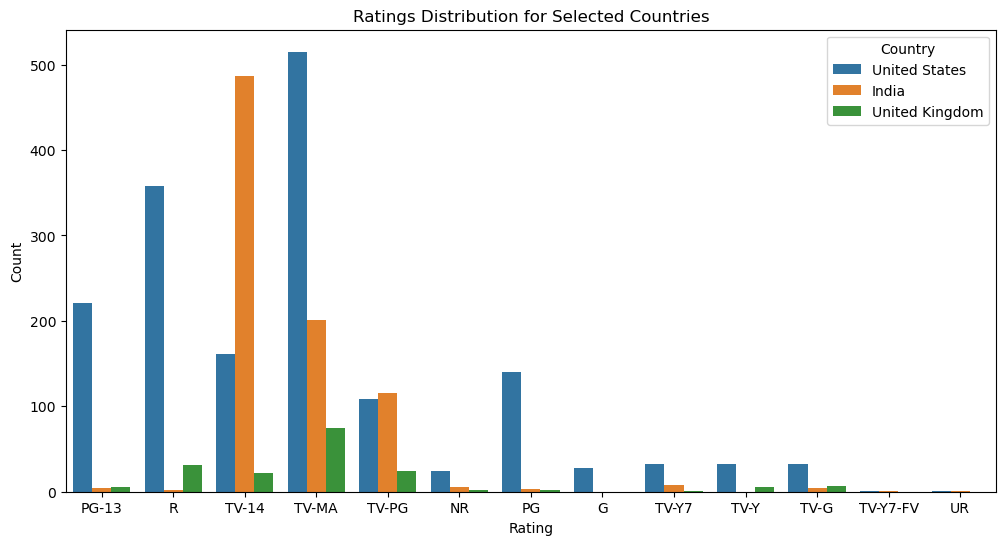

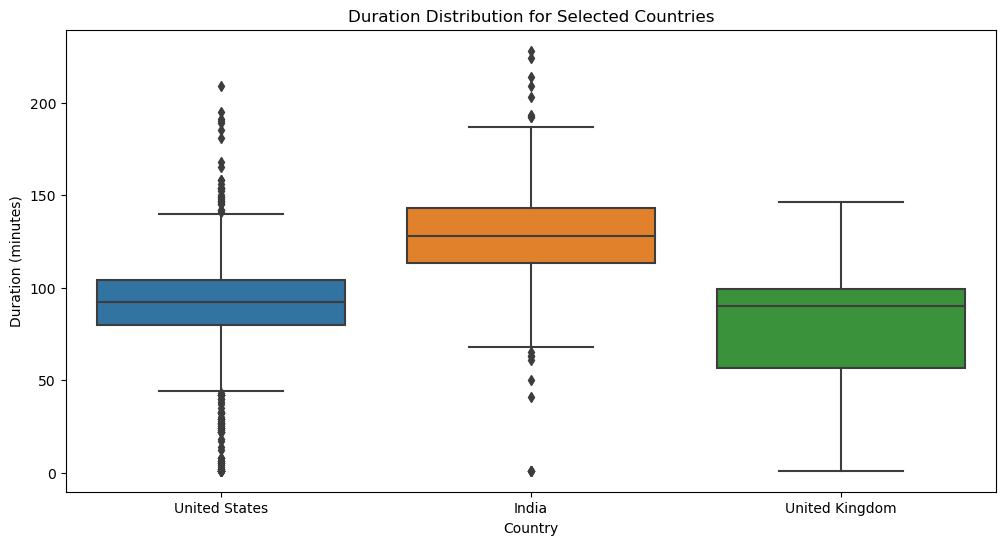

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'data'

# Choose specific countries to focus on
selected_countries = ['United States', 'India', 'United Kingdom']

# Filter data for selected countries
selected_data = data[data['Country'].isin(selected_countries)]

# 1. Ratings Analysis
plt.figure(figsize=(12, 6))
sns.countplot(x='Rating', hue='Country', data=selected_data)
plt.title('Ratings Distribution for Selected Countries')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


# 2. Durations Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Minutes', data=selected_data)
plt.title('Duration Distribution for Selected Countries')
plt.xlabel('Country')
plt.ylabel('Duration (minutes)')
plt.show()
